In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import itertools
import cv2
import imageio
import os
from glob import glob

import natsort

In [3]:
# 멀티 인덱스로 가져야되나?
# sheet도 여러개라서 다시 사용해야됨 Days2부터 있음.
path = '../data/'

im_path = '../data/Figure/'
plaque = pd.read_excel(path + 'plaque_processed.xlsx')
plaque.fillna(method='ffill', inplace=True)
df = plaque.groupby(['Virus','Day','SNPs'])

# 그룹별 데이터프레임을 생성 후 dict에 저장
output = dict(list(df))
output.keys()

day_list = ['Day2', 'Day3', 'Day4', 'Day5', 'Day6']
plaque_list = ['2NPC1','Y420S', 'P424A', 'S425L', 'D502E','D508N']

def S_type(virus:str,Day : str):
    temp = pd.DataFrame()
    for i in plaque_list:
        temp = pd.concat([temp, output[(virus, Day, i)]])
    return temp

def D_type(virus, snps):
    temp = pd.DataFrame()
    for i in day_list:
        temp = pd.concat([temp, output[(virus,i , snps)]])
    return temp

,Virus,Day,SNPs,Index,X,Y,Size [sqmm],Mean Spot Intensity,Max Spot Intensity,Circularity
0,Angola,Day2,2NPC1,24,19.663293,23.153970,0.917399,0.785083,0.937255,1.320042
1,NaN,NaN,NaN,30,2.844735,19.925715,1.270655,0.822522,0.949020,1.422423
2,NaN,NaN,NaN,31,19.619222,18.813872,0.711774,0.726718,0.933333,1.264626
3,NaN,NaN,NaN,32,27.559517,16.893689,0.165199,0.712244,0.901961,1.187720
4,NaN,NaN,NaN,33,14.248888,15.565058,0.653779,0.715452,0.917647,1.463410
...,...,...,...,...,...,...,...,...,...,...
661,NaN,NaN,NaN,7,11.141883,21.636296,10.388520,0.680900,0.898000,1.645496
662,NaN,NaN,NaN,8,29.369066,20.143690,9.743524,0.705700,0.909800,1.575720
663,NaN,NaN,NaN,12,4.307396,14.662917,11.803303,0.749300,0.917600,1.591042
664,NaN,NaN,NaN,14,15.784313,13.388278,9.942119,0.665000,0.886300,1.696404


In [5]:
S_type('Angola','Day6')

,Virus,Day,SNPs,Index,X,Y,Size [sqmm],Mean Spot Intensity,Max Spot Intensity,Circularity
245,Angola,Day6,2NPC1,2,22.049747,30.722570,18.831514,0.815900,0.956900,1.844405
246,Angola,Day6,2NPC1,3,11.366819,30.101305,18.075791,0.791800,0.960800,1.706059
247,Angola,Day6,2NPC1,4,16.520040,28.607577,19.441366,0.814700,0.952900,1.536254
248,Angola,Day6,2NPC1,7,24.037976,25.775766,18.457171,0.827900,0.949000,1.593650
249,Angola,Day6,2NPC1,14,29.031557,22.318819,19.868438,0.823000,0.941200,1.580026
250,Angola,Day6,2NPC1,30,10.837770,10.815590,17.903560,0.821300,0.941200,1.596791
251,Angola,Day6,2NPC1,33,16.082448,9.152467,17.154867,0.776900,0.925500,1.552050
252,Angola,Day6,Y420S,14,18.465551,25.759868,21.741928,0.818394,0.913725,1.603196
253,Angola,Day6,Y420S,15,8.014680,23.250970,22.481825,0.808110,0.921569,1.636049
254,Angola,Day6,Y420S,17,22.078549,21.478813,22.926476,0.829976,0.913725,1.572483


In [23]:
import networkx as nx
import math

radius=2
h = 10
# 가로
w = 20


G = nx.triangular_lattice_graph(m=h, n=w, periodic=False, with_positions=True, create_using=None)
pos = nx.get_node_attributes(G, 'pos')

center = (h//2+1, h//2+1)
center_pos = G.nodes[center]['pos']

circle_nodes = set()

for node, poss in pos.items():
    distance = math.sqrt((poss[0] - center_pos[0])**2 + (poss[1] - center_pos[1])**2)
    if distance <= radius:
        circle_nodes |= {node}

H = nx.subgraph(G, circle_nodes)

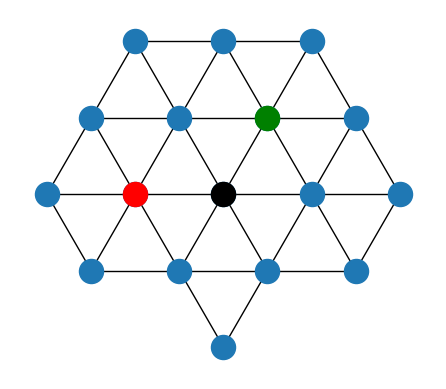

In [30]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
nx.draw(H, pos, with_labels=False)
nx.draw_networkx_nodes(H, pos, nodelist=[center], node_color='black') 
nx.draw_networkx_nodes(H, pos, nodelist=[(6,7)], node_color='green')
nx.draw_networkx_nodes(H, pos, nodelist=[(5,6)], node_color='red')
